<font color='blue'> **gis-utils** </font> 

In [1]:
from pathlib import Path ; import numpy as np ; import pandas as pd ; import geopandas as gp ; import rasterio ; import gisutils ; import matplotlib.pyplot as plt
TA=Path("./TA"); TA.mkdir(exist_ok=True); import os ; from rasterio.plot import show  ; import flopy ; from shapely.geometry import Point
R1 = Path('E:/15_REPOS/02_Beta-Me/data/gis-utils')  ; files = [os.path.join(R1/'NHDPlus04_flowline.shp'),os.path.join(R1/'NHDPlus07_flowline.shp')]
TIF = os.path.join(R1/'top.tif')

In [2]:
CRS = gisutils.get_shapefile_crs(files[0]) ; print(files[0], 'CRS' ,CRS)

E:\15_REPOS\02_Beta-Me\data\gis-utils\NHDPlus04_flowline.shp CRS EPSG:4269


In [3]:
%%capture
df = gisutils.shp2df(files);df.to_csv(TA/'BA0_two_shapes.csv')           ; gisutils.df2shp(df, 'TA/BA1.shp', crs=4269)      # Combine shp | reWrite shp
gisutils.df2shp(df.drop('geometry', axis=1), 'TA/BA1.dbf')  #  _______________________________________________________  Write NEW .DBF files ____________ !

In [4]:
x5070, y5070 = gisutils.project((-91.87370, 34.93738), CRS, 5070)    ; print(int(x5070), int(y5070),'__________'          , gisutils.project((x5070, y5070), 5070, CRS))
x, y = df.geometry.values[0].coords.xy                                                                                    ; print(x, y) #; df.geometry.values[0]
x, y = df.geometry.values[0].coords.xy                               ; x3070,y3070 = gisutils.project((x, y), 4269, 3070) ; print(x3070, y3070)

373687 1327908 __________ (-91.8737, 34.937380000000005)
array('d', [-89.26039797189003, -89.2579247052272, -89.25621370522987, -89.25458977189902, -89.25401490523325, -89.25257830523549, -89.25215330523616, -89.25117910523767, -89.25032990523897, -89.24854390524177, -89.24863097190831, -89.24822310524223, -89.2481227719091]) array('d', [44.03200613165353, 44.03036993165608, 44.02990519832349, 44.028563798325536, 44.02727593166088, 44.02581819832983, 44.02478959833144, 44.02398473166602, 44.02368973166648, 44.022214198335405, 44.0213375983368, 44.02089139833748, 44.02087259833752])
array('d', [579265.1077264423, 579464.9296831822, 579602.5037546933, 579733.9833919932, 579781.3452866407, 579897.9389532936, 579933.0346628772, 580011.9199958814, 580080.2745762386, 580224.9028089752, 580218.8122406754, 580251.9528742861, 580260.0132546861]) array('d', [395693.57724608574, 395513.6278105201, 395463.2462046379, 395315.4341270579, 395172.8092087172, 395011.9435474267, 394898.0072433781, 39480

In [5]:
geom_3070 = gisutils.project(df.geometry.values[0], 4269, 3070)     ; geom_4269 = gisutils.project(geom_3070, 3070, 4269)       # shapley geometry object
geom_4269.equals_exact(df.geometry.values[0], tolerance=0.0001)     # geom_4269.almost_equals(df.geometry.values[0])

True

In [6]:
%%capture
T01= rasterio.open(TIF)     #;show(T01)                        # with rasterio.open(TIF) as src: show(src)                                   # PLOT in sequence
gisutils.projection.project_raster(TIF, 'TA/BA2.tif', 4269)    ; gisutils.projection.project_raster(TIF, 'TA/BA3.tif', 5070,resolution=1e4)  # Reproject # New resolution

**One** [`pyproj.CRS`](https://pyproj4.github.io/pyproj/stable/examples.html#using-CRS) 
**Other** [Not recommended anymore](https://pyproj4.github.io/pyproj/stable/gotchas.html#what-is-the-best-format-to-store-the-CRS-information)
**Then** [spatialreference.org lists at least 3](https://spatialreference.org/ref/epsg/3070/)
**So** (as a [``pyproj.CRS``](https://pyproj4.github.io/pyproj/stable/api/CRS/CRS.html) instance)

In [7]:
proj_str_3070 = (('+proj=tmerc +lat_0=0 +lon_0=-90 +k=0.9996 ''+x_0=520000 +y_0=-4480000 +ellps=GRS80 ''+datum=NAD83  +units=m +no_defs'))
#CRS_3070 = gisutils.get_authority_crs(proj_str_3070)    ; CRS_3070
CRS_3070 = gisutils.get_authority_crs(3070) # ==
wkt_3070 = ('PROJCS["NAD83 / Wisconsin Transverse Mercator",'   'GEOGCS["GCS_North_American_1983",'     'DATUM["D_North_American_1983",'
            'SPHEROID["GRS_1980",6378137,298.257222101]],'      'PRIMEM["Greenwich",0],'                'UNIT["Degree",0.017453292519943295]],'
            'PROJECTION["Transverse_Mercator"],'                'PARAMETER["latitude_of_origin",0],'    'PARAMETER["central_meridian",-90],'
            'PARAMETER["scale_factor",0.9996],'                 'PARAMETER["false_easting",520000],'    'PARAMETER["false_northing",-4480000],'     'UNIT["Meter",1]]')   #;CRS_3070
print(gisutils.raster.get_raster_crs(TIF))  ; CRS_3070 == gisutils.get_authority_crs(wkt_3070)

EPSG:5070


True

<font color='orange'> **__________________________________________________________________________________________________________________________** </font> 

In [8]:
#with rasterio.open(TIF) as src:     print(src.meta)         # ... a grid of x, y locations that covers the same area as the raster in ``TIF``.

In [9]:
nrow, ncol = 700, 700       ; x=np.arange(ncol)*1000+177955.0       ; y=1604285.0-(np.arange(nrow)*1000)[::-1]         ; X,Y = np.meshgrid(x, y)  #pd.DataFrame(X) #.to_csv (TA/"X.csv")
sampled = gisutils.get_values_at_points(TIF, x=X.ravel(), y=Y.ravel(),points_crs=None)                                 ; sampled = np.reshape(sampled, (nrow, ncol)) 
pd.DataFrame(sampled).to_csv (TA/"BA4_sampled.csv") ;               # plt.pcolormesh(X, Y, sampled, shading='auto')    ; plt.gca().set_aspect(1)

reading data from E:\15_REPOS\02_Beta-Me\data\gis-utils\top.tif...
finished in 27.47s


<font color='orange'> **__________________________________________________________________________________________________________________________** </font> 

In [10]:
%%capture
stride = 10 ; geoms = [Point(x, y) for x, y in zip(X[::stride].ravel(), Y[::stride].ravel())]           # Convert a set of points to a raster ______________
df = gp.GeoDataFrame({'geometry': geoms,'elevation': sampled[::stride].ravel()},crs=5070)               ; df.to_file('TA/BA5_Pts_RASTER.shp')
gisutils.raster.points_to_raster('TA/BA5_Pts_RASTER.shp',data_col='elevation',output_resolution=1000,outfile=TA/'BA6_surface.tif')

In [11]:
with rasterio.open(TIF) as SRC:       AR = SRC.read(1)      # SRC=rasterio.open(TIF).read(1)   # ______________  get the lower left corner of the array in ``TIF``
XLL = SRC.transform[2]              ; YLL = SRC.transform[5] + SRC.height * SRC.transform[4]                                            ; print(XLL, YLL)
gisutils.raster.write_raster('TA/BA7_surface.tif', AR   , xll=XLL, yll=YLL,dx=1000, dy=1000, rotation=0, nodata=-9999,CRS = 5070)       ; MASK = np.ma.masked_array(AR, AR==-9999)      
gisutils.raster.write_raster('TA/BA8_surface.tif', MASK , xll=XLL, yll=YLL,dx=1000, dy=1000, rotation=0              ,CRS = 5070)

177955.0 938285.0
wrote TA/BA7_surface.tif
wrote TA/BA8_surface.tif


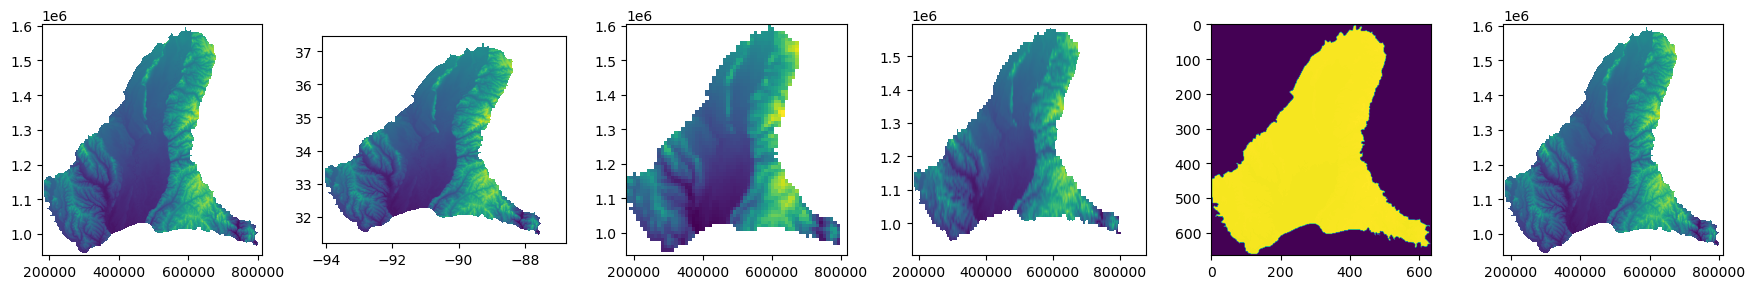

In [12]:
fig = plt.figure(figsize=(22,3))
B0=flopy.utils.Raster.load(TIF)                     ; ax = fig.add_subplot(161)     ; B0.plot(ax=ax)
B1=flopy.utils.Raster.load(TA/'BA2.tif')            ; ax = fig.add_subplot(162)     ; B1.plot(ax=ax)
B2=flopy.utils.Raster.load(TA/'BA3.tif')            ; ax = fig.add_subplot(163)     ; B2.plot(ax=ax)       
B3=flopy.utils.Raster.load(TA/'BA6_surface.tif')    ; ax = fig.add_subplot(164)     ; B3.plot(ax=ax)       
n='n'                                               ; ax = fig.add_subplot(165)     ; plt.imshow(rasterio.open(TIF).read(1))     
B4=flopy.utils.Raster.load(TA/'BA8_surface.tif')    ; ax = fig.add_subplot(166)     ; B4.plot(ax=ax)       ; plt.show(block=False)    